In [33]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Import svm model
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
#Load dataset

DataFrame= {
#     'kamera': { 'training':  '', 'testing': '' },
    'kamera': { 'training':  '', 'testing': '' }
}


# DataFrame['kamera']['training'] = pd.read_csv("Dataframe Jenis Perlakuan [kamera][Training].csv")
DataFrame['kamera']['training'] = pd.read_csv("Dataframe Jenis Perlakuan [Kamera][Training].csv")
# DataFrame['kamera']['testing'] = pd.read_csv("Dataframe Jenis Perlakuan [kamera][Testing].csv")
DataFrame['kamera']['testing'] = pd.read_csv("Dataframe Jenis Perlakuan [Kamera][Testing].csv")

In [35]:
DataFrame['kamera']['training']

,filename,contrast_00,contrast_45,contrast_90,contrast_135,corellation_00,corellation_45,corellation_90,corellation_135,homogeneity_00,...,variance_90,variance_135,r,g,b,h,s,i,grayscale,class
0,IMG_3625.JPG,89.304318,156.939550,114.539124,161.253519,0.001553,0.001470,0.001533,0.001464,0.189943,...,588.915807,589.639598,0.634655,0.649327,0.694796,0.657724,0.022080,0.259886,0.661247,0
1,IMG_3628.JPG,127.508797,224.174034,160.339321,213.790688,0.001088,0.001032,0.001076,0.001039,0.151384,...,841.127436,839.786792,0.625447,0.627529,0.706534,0.651685,0.029694,0.493180,0.651028,0
2,IMG_3632.JPG,144.620940,284.007254,197.662094,280.853680,0.001043,0.000954,0.001010,0.000956,0.143149,...,878.773324,878.341970,0.539365,0.526939,0.646141,0.569098,0.038398,0.751984,0.564079,0
3,IMG_3634.JPG,73.744402,151.441317,107.082616,150.899374,0.000807,0.000783,0.000798,0.000783,0.201812,...,1197.502563,1196.658687,0.486547,0.477297,0.620656,0.526248,0.049390,0.671413,0.521268,0
4,IMG_3639.JPG,85.110667,152.349929,109.588644,156.276025,0.001243,0.001193,0.001228,0.001190,0.215298,...,755.097875,753.450692,0.624908,0.628603,0.709802,0.653175,0.028824,0.513115,0.652477,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,IMG_3730.JPG,68.602731,128.149482,92.882751,134.291649,0.000617,0.000607,0.000615,0.000605,0.338357,...,1578.805962,1582.004760,0.577440,0.573045,0.675888,0.608146,0.036213,0.547266,0.604387,2
248,IMG_3734.JPG,103.693775,173.443177,118.376169,175.291463,0.001275,0.001209,0.001259,0.001207,0.221988,...,729.952510,728.971767,0.573359,0.561103,0.669270,0.599338,0.035454,0.818086,0.594914,2
249,IMG_3737.JPG,118.205278,206.188728,141.725763,197.359043,0.001179,0.001115,0.001170,0.001123,0.178591,...,776.619214,777.582046,0.474732,0.469076,0.618928,0.519771,0.048975,0.578571,0.514587,2
250,IMG_3738.JPG,56.159879,109.823300,77.850271,109.601215,0.000912,0.000896,0.000912,0.000896,0.340823,...,1056.542194,1058.099203,0.608935,0.599802,0.672656,0.625829,0.027220,0.722855,0.622648,2


In [36]:
DataFrame['kamera']['testing']

,filename,contrast_00,contrast_45,contrast_90,contrast_135,corellation_00,corellation_45,corellation_90,corellation_135,homogeneity_00,...,variance_90,variance_135,r,g,b,h,s,i,grayscale,class
0,IMG_3626.JPG,66.474348,127.932792,91.597072,117.352781,0.000767,0.000753,0.000765,0.000756,0.237693,...,1260.464356,1260.562685,0.613180,0.595858,0.688730,0.630869,0.028135,0.866179,0.625624,0
1,IMG_3630.JPG,117.816806,205.008990,143.409633,199.349929,0.001234,0.001162,0.001213,0.001167,0.238055,...,744.916115,741.396155,0.644005,0.637375,0.698425,0.657911,0.023827,0.652940,0.656444,0
2,IMG_3636.JPG,44.137918,102.842954,82.431656,116.350921,0.001010,0.000981,0.000990,0.000974,0.270279,...,966.960658,965.275128,0.528568,0.523766,0.642330,0.563635,0.040063,0.643506,0.559777,0
3,IMG_3647.JPG,226.806102,361.879162,260.104638,352.378201,0.001653,0.001328,0.001575,0.001351,0.107439,...,452.191154,451.175506,0.619191,0.622797,0.689975,0.642731,0.023299,0.364534,0.642688,0
4,IMG_3650.JPG,133.226070,253.200942,181.882197,244.378511,0.001424,0.001273,0.001362,0.001284,0.174730,...,628.015097,626.985826,0.571752,0.566307,0.655702,0.595873,0.032055,0.629392,0.593716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,IMG_3725.JPG,106.605500,186.190402,124.574803,184.902412,0.001033,0.000995,0.001030,0.000995,0.180529,...,904.426788,901.608558,0.466271,0.476476,0.584167,0.507787,0.041298,0.347642,0.507539,2
104,IMG_3728.JPG,53.455770,106.916796,81.306041,108.026536,0.000826,0.000809,0.000818,0.000808,0.274790,...,1180.047454,1180.359823,0.580762,0.555620,0.650293,0.594035,0.028960,0.897783,0.586829,2
105,IMG_3732.JPG,63.327448,129.661045,91.508612,122.476099,0.001499,0.001420,0.001466,0.001429,0.226291,...,632.669989,632.004636,0.492440,0.468362,0.615878,0.524224,0.046835,0.876800,0.515225,2
106,IMG_3740.JPG,148.494094,242.967884,172.848179,244.392337,0.000648,0.000626,0.000640,0.000626,0.140743,...,1469.760636,1465.408042,0.470720,0.475852,0.596121,0.512664,0.046496,0.318969,0.511269,2


# RGB

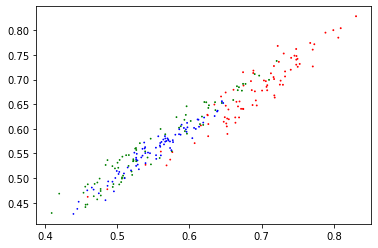

In [37]:
data_feature_training = DataFrame['kamera']['training'][['r', 'g', 'b']]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['r', 'g', 'b']]
data_class_testing = DataFrame['kamera']['testing']["class"]


colors = {0: 'r' , 1 : 'g' , 2: 'b' ,}
plt.scatter(data_feature_training['r'], 
            data_feature_training['g'], 
            data_feature_training['b'], 
            c=[colors[k] for k in data_class_training])

In [38]:
#Import svm model
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.48      0.33      0.39        36
           2       0.56      0.69      0.62        36

    accuracy                           0.64       108
   macro avg       0.63      0.64      0.63       108
weighted avg       0.63      0.64      0.63       108



In [39]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        36
           1       0.65      0.36      0.46        36
           2       0.53      0.81      0.64        36

    accuracy                           0.67       108
   macro avg       0.70      0.67      0.66       108
weighted avg       0.70      0.67      0.66       108



[0.6876769079213717, 0.5502371680280185, 0.5513905786110017]
[0.673616317050909, 0.5627141729901596, 0.5553880251644928]
[0.7456976968033308, 0.6509191375931882, 0.6493640575533599]


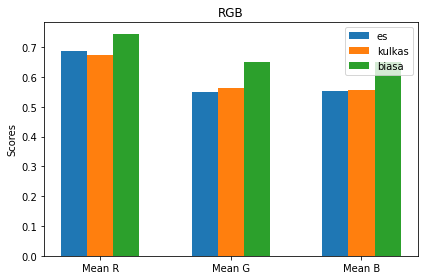

In [40]:
labels = ['Mean R', 'Mean G', 'Mean B']

dataframe = DataFrame['kamera']['training'][['r', 'g', 'b', 'class']]
data_es = dataframe.query("`class` == 0")
data_kulkas = dataframe.query("`class` == 1")
data_biasa = dataframe.query("`class` == 2")


r_means = [np.mean(data_es['r']), np.mean(data_kulkas['r']), np.mean(data_biasa['r'])]
print(r_means)
g_means = [np.mean(data_es['g']), np.mean(data_kulkas['g']), np.mean(data_biasa['g'])]
print(g_means)
b_means = [np.mean(data_es['b']), np.mean(data_kulkas['b']), np.mean(data_biasa['b'])]
print(b_means)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, r_means, width, label='es')
rects2 = ax.bar(x, g_means, width, label='kulkas')
rects3 = ax.bar(x + width, b_means, width, label='biasa')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('RGB')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# HSI

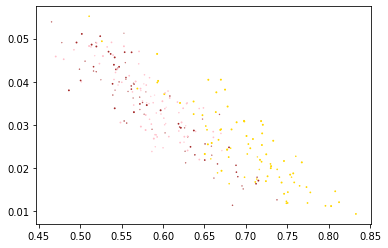

In [41]:
data_feature_training = DataFrame['kamera']['training'][['h', 's', 'i']]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['h', 's', 'i']]
data_class_testing = DataFrame['kamera']['testing']["class"]


colors = {0: 'gold' , 1 : 'brown' , 2: 'pink' ,}
plt.scatter(data_feature_training['h'], 
            data_feature_training['s'], 
            data_feature_training['i'], 
            c=[colors[k] for k in data_class_training])

In [42]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        36
           1       0.46      0.72      0.56        36
           2       0.56      0.25      0.35        36

    accuracy                           0.56       108
   macro avg       0.59      0.56      0.55       108
weighted avg       0.59      0.56      0.55       108



In [43]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        36
           1       0.65      0.47      0.55        36
           2       0.60      0.78      0.67        36

    accuracy                           0.69       108
   macro avg       0.69      0.69      0.68       108
weighted avg       0.69      0.69      0.68       108



[0.7007554283106471, 0.5863903825690432, 0.5839074399290967]
[0.02465007365250783, 0.034327063751933014, 0.03539246631269691]
[0.7182245277668359, 0.33891661400888473, 0.4249508669841635]


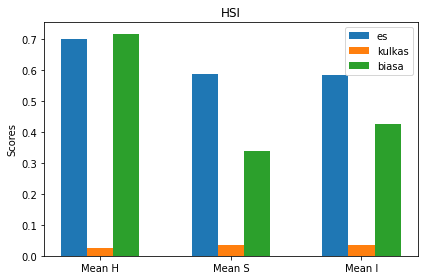

In [44]:
labels = ['Mean H', 'Mean S', 'Mean I']

dataframe = DataFrame['kamera']['training'][['h', 's', 'i', 'class']]
data_es = dataframe.query("`class` == 0")
data_tidak_es = dataframe.query("`class` == 1")
data_biasa = dataframe.query("`class` == 2")


h_means = [np.mean(data_es['h']), np.mean(data_tidak_es['h']), np.mean(data_biasa['h'])]
print(h_means)
s_means = [np.mean(data_es['s']), np.mean(data_tidak_es['s']), np.mean(data_biasa['s'])]
print(s_means)
i_means = [np.mean(data_es['i']), np.mean(data_tidak_es['i']), np.mean(data_biasa['i'])]
print(i_means)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, h_means, width, label='es')
rects2 = ax.bar(x, s_means, width, label='kulkas')
rects3 = ax.bar(x + width, i_means, width, label='biasa')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('HSI')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# GRAYSCALE

In [45]:
data_feature_training = DataFrame['kamera']['training'][['grayscale',]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['grayscale',]]
data_class_testing = DataFrame['kamera']['testing']["class"]


# colors = {0: 'black' , 1 : 'red' , 2: 'blue' ,}
# plt.scatter(data_feature_training['grayscale'],y=""
#             c=[colors[k] for k in data_class_training])

In [46]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        36
           1       0.41      0.25      0.31        36
           2       0.53      0.69      0.60        36

    accuracy                           0.61       108
   macro avg       0.59      0.61      0.59       108
weighted avg       0.59      0.61      0.59       108



In [47]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        36
           1       0.60      0.33      0.43        36
           2       0.57      0.78      0.66        36

    accuracy                           0.67       108
   macro avg       0.66      0.67      0.65       108
weighted avg       0.66      0.67      0.65       108



0.7099385712401279
0.5942973151445909
0.5794373289951831


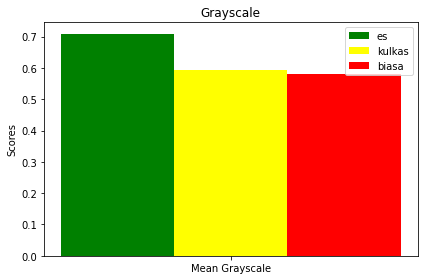

In [48]:
labels = ['Mean Grayscale']

dataframe = DataFrame['kamera']['testing'][['grayscale', 'class']]
data_es = dataframe.query("`class` == 0")
data_tidak_es = dataframe.query("`class` == 1")
data_biasa = dataframe.query("`class` == 2")


h_means = np.mean(data_es['grayscale'])
print(h_means)
s_means = np.mean(data_tidak_es['grayscale'])
print(s_means)
i_means = np.mean(data_biasa['grayscale'])
print(i_means)


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, h_means, width, label='es', color='green')
rects2 = ax.bar(x, s_means, width, label='kulkas' , color='yellow')
rects3 = ax.bar(x + width, i_means, width, label='biasa',  color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Grayscale')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# GLCM

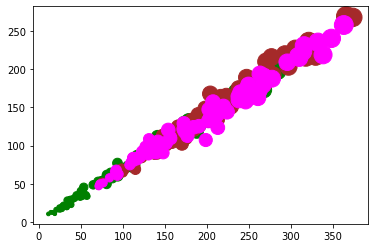

In [49]:
data_feature_training = DataFrame['kamera']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    ]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                  ]]
data_class_testing = DataFrame['kamera']['testing']["class"]


colors = {0: 'green' , 1 : 'brown' , 2: 'magenta' ,}
plt.scatter(
#             data_feature_training['contrast_00'],
            data_feature_training['contrast_45'],
            data_feature_training['contrast_90'],
            data_feature_training['contrast_135'],
#             data_feature_training['corellation_00'],
#             data_feature_training['corellation_45'],
#             data_feature_training['corellation_90'],
#             data_feature_training['corellation_135'],
#             data_feature_training['homogeneity_00'],
#             data_feature_training['homogeneity_45'],
#             data_feature_training['homogeneity_90'],
#             data_feature_training['homogeneity_135'],
#             data_feature_training['entropy_00'],
#             data_feature_training['entropy_45'],
#             data_feature_training['entropy_90'],
#             data_feature_training['entropy_135'],
#             data_feature_training['variance_00'],
#             data_feature_training['variance_45'],
#             data_feature_training['variance_90'],
#             data_feature_training['variance_135'],
            c=[colors[k] for k in data_class_training])

In [50]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68        36
           1       0.68      0.72      0.70        36
           2       0.63      0.72      0.68        36

    accuracy                           0.69       108
   macro avg       0.69      0.69      0.68       108
weighted avg       0.69      0.69      0.68       108



In [51]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        36
           1       0.58      0.53      0.55        36
           2       0.55      0.64      0.59        36

    accuracy                           0.60       108
   macro avg       0.61      0.60      0.60       108
weighted avg       0.61      0.60      0.60       108



# GLCM+RGB

In [52]:
data_feature_training = DataFrame['kamera']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'r',
                                                    'g',
                                                    'b',
                                                    ]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'r',
                                                    'g',
                                                    'b',
                                                  ]]
data_class_testing = DataFrame['kamera']['testing']["class"]

In [53]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        36
           1       0.75      0.75      0.75        36
           2       0.63      0.75      0.68        36

    accuracy                           0.73       108
   macro avg       0.75      0.73      0.73       108
weighted avg       0.75      0.73      0.73       108



In [54]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        36
           1       0.58      0.53      0.55        36
           2       0.55      0.64      0.59        36

    accuracy                           0.60       108
   macro avg       0.61      0.60      0.60       108
weighted avg       0.61      0.60      0.60       108



# GLCM+HSI

In [55]:
data_feature_training = DataFrame['kamera']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'h',
                                                    's',
                                                    'i',
                                                    ]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'h',
                                                    's',
                                                    'i',
                                                  ]]
data_class_testing = DataFrame['kamera']['testing']["class"]


In [56]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        36
           1       0.67      0.83      0.74        36
           2       0.68      0.69      0.68        36

    accuracy                           0.75       108
   macro avg       0.78      0.75      0.75       108
weighted avg       0.78      0.75      0.75       108



In [57]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        36
           1       0.58      0.53      0.55        36
           2       0.55      0.64      0.59        36

    accuracy                           0.60       108
   macro avg       0.61      0.60      0.60       108
weighted avg       0.61      0.60      0.60       108

